<td>
    <a target="_blank" href="https://colab.research.google.com/github/jjerry-k/learning_framework/blob/main/01_Basic/Logistic_Regression/PyTorch.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
</td>

In [1]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader

from torchvision import datasets
from torchvision import transforms

import numpy as np
from matplotlib import pyplot as plt

In [2]:
# MNIST dataset
mnist_train = datasets.MNIST(root="../../data",
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)
print("Downloading Train Data Done ! ")

mnist_test = datasets.MNIST(root="../../data",
                            train=False,
                            transform=transforms.ToTensor(),
                            download=True)
print("Downloading Test Data Done ! ")

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# Our model
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear = nn.Linear(784,1)

    def forward(self, X):
        X = self.linear(X)
        return X

model = Model().to(device)

criterion  = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

batch_size = 100

train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size=36, shuffle=False)

In [4]:
for epoch in range(2):
    avg_loss = 0
    total_batch = len(mnist_train)//batch_size
    for i, (batch_img, batch_lab) in enumerate(train_loader):

        # 0 : digit < 5
        # 1 : digit >= 5
        X = batch_img.view(-1, 28*28).to(device)

        # To use BCEWithLogitsLoss
        # 1. Target tensor must be same as predict result's size 
        # 2. Target tensor's type must be Float
        Y = batch_lab.unsqueeze(dim=1) 
        Y = Y.type(torch.FloatTensor).to(device) 
        Y[Y<5] = 0
        Y[Y>=5] = 1
        

        y_pred = model.forward(X)
        loss = criterion(y_pred, Y)
        # Zero gradients, perform a backward pass, and update the weights.

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        avg_loss += loss

        if (i+1)%100 == 0 :
            print("Epoch : ", epoch+1, "Iteration : ", i+1, " Loss : ", avg_loss.item()/(i+1))
    print("Epoch : ", epoch+1, " Loss : ", avg_loss.item()/(i+1))
print("Training Done !")

Epoch :  1 Iteration :  100  Loss :  0.6321082305908203
Epoch :  1 Iteration :  200  Loss :  0.5963720321655274
Epoch :  1 Iteration :  300  Loss :  0.5701473999023438
Epoch :  1 Iteration :  400  Loss :  0.5509587097167968
Epoch :  1 Iteration :  500  Loss :  0.53617138671875
Epoch :  1 Iteration :  600  Loss :  0.5245042928059895
Epoch :  1  Loss :  0.5245042928059895
Epoch :  2 Iteration :  100  Loss :  0.46025493621826175
Epoch :  2 Iteration :  200  Loss :  0.4547901153564453
Epoch :  2 Iteration :  300  Loss :  0.45132349650065107
Epoch :  2 Iteration :  400  Loss :  0.4459754180908203
Epoch :  2 Iteration :  500  Loss :  0.44321365356445314
Epoch :  2 Iteration :  600  Loss :  0.4407887776692708
Epoch :  2  Loss :  0.4407887776692708
Training Done !


Accuracy :  82.80999999999999


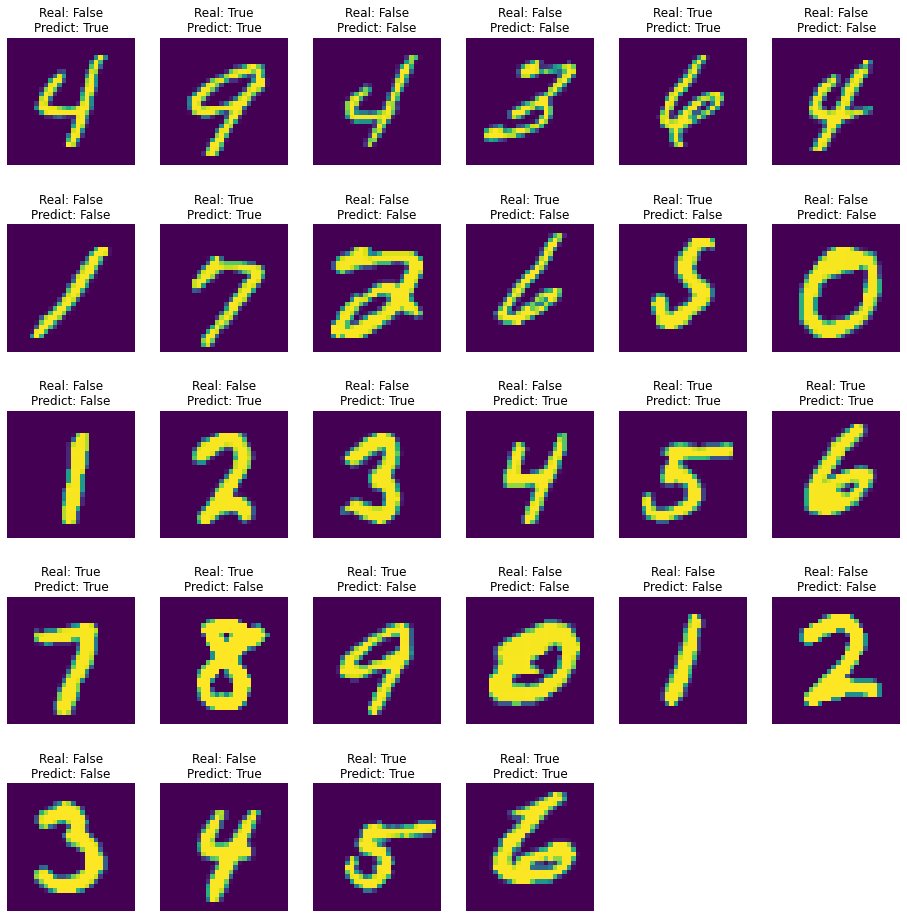

In [5]:
# Evaluation
total_data = 0
eval_acc = 0
for i, (batch_img, batch_lab) in enumerate(test_loader):
    X = batch_img.view(-1, 28*28).to(device)

    Y = batch_lab.unsqueeze(dim=1) 
    Y = Y.type(torch.FloatTensor).to(device) 
    Y[Y<5] = 0
    Y[Y>=5] = 1

    outputs = model.forward(X)
    outputs = torch.sigmoid(outputs)
    outputs = torch.greater_equal(outputs, 0.5)
    correct = (outputs == Y).sum()

    eval_acc += correct
    total_data += len(X)

print('Accuracy : ', eval_acc.item()/total_data*100)

plt.figure(figsize=(16, 20))
for idx, img in enumerate(batch_img):
    plt.subplot(6, 6, idx+1)
    plt.imshow(img[0])
    plt.title(f"Real: {Y[idx].type(torch.bool).item()}\nPredict: {outputs[idx].item()}")
    plt.axis("off")

